In [99]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 26 16:05:45 2022

@author: pablobelzarena
"""
import scenarios as sc
import antennas as antennas
import channel_performance as cp
import frequency_band as fb
import numpy as np
import os,sys
import errno
import matplotlib.pyplot as plt


In [100]:
sys.path.append('./src')
sys.path.append('./src/gui')
sys.path.append('./src/graph')

SIM_NAME = "test" #the name of the simulation. Used to give the name 

In [121]:
######## Build and configure the receive and transmit antennas 
nMS=2 # number of antennas in the Mobile Station antenna array
nBS = 2 # number of antennas in the Base Station antenna array
antenna_gain = 8
aeBS = antennas.Antenna3gpp3D(antenna_gain) # Build the Base Station antenna element
aBS  = antennas.AntennaArray3gpp(0.5, 0.5, 1, nBS, 0, 0, 0, aeBS, 1,"antennaRx") # Build the Base Station antenna array 
aeMS  = antennas.AntennaIsotropic(antenna_gain) #Build the Mobile Station antenna element
aMS  = antennas.AntennaArray3gpp(0.5, 0.5, 1, nMS, 0, 0, 0, aeMS, 1,"antennaTx") # Build the MS antenna array

In [122]:
###### Build the steering vectors for beamforming according the the BS and MS positions
wBS = aBS.compute_phase_steering (0,np.pi/2,0,0)
""" BS steering vector for beamforming""" 
wMS = aMS.compute_phase_steering (np.pi,np.pi/2,0,0)
""" MS steering vector for beamforming"""
#####################################################    

' MS steering vector for beamforming'

In [123]:
######## Build the scenario 
fcGHz = .89  # Scenario frequency in GHz 
# The next variables define the maximum and minimum x and y coordinates of the system (in meters)
posx_min = -100
posx_max = 100
posy_min = -100
posy_max = 100
grid_number = 25 # The number of elements in the grid. In order to define the parameters of the scenario PyWiCh generate a grid        of correlated parameters. The grid has  grid_number x  grid_number points.
BS_pos = np.array([0,0,20]) # The position of the Base Station device in the scenario.
Ptx_db = 30 # The Transmit power of the BS in dbm
force_los = 2 # The Line of Sight condition. If variable is 0 Non LOS is forced in all points of the scenario. If it is 1 LOS is forced in all scenario. If its value is 2 the LOS condition come from the scenario probability model.
scf = sc.Scenario3GPPUmi(fcGHz, posx_min,posx_max, posy_min, posy_max, grid_number, BS_pos, Ptx_db,True,force_los)

In [124]:
########## Build the OFDM frequency band
freq_band =  fb.FrequencyBand(fcGHz=fcGHz,number_prbs=81,bw_prb=10000000,noise_figure_db=5.0,thermal_noise_dbm_Hz=-174.0) 
freq_band.compute_tx_psd(tx_power_dbm=30) # Sets the BS tranmision power and build the power spectral density of each subchannel of the OFDM systems.
###################################################
 #### Build the channel performance object to runs the simulation  and gets the results after the simulation
performance  = cp.ChannelPerformance()

In [133]:
for pos in mspositions1:
    print(np.sqrt(pos[0]**2+pos[1]**2))

14.142135623730951
22.360679774997898


In [137]:
performance.compute_path(scf, freq_band, aBS, aMS, np.array([mspositions1]), times, 1, path, 0, fix_beamforming=True)

In [108]:
###################### Mobile stations routes configuratiom
n_MS = 1 # number of MSs in this simulation
positions = np.empty(shape=(n_MS),dtype = object) # The positions of the route of all MSs
mspositions1= np.array(([10,10,2],[20,10,2])) # The positions of the MS 1. It has only two points in its route.
positions[0] = mspositions1
times  = np.empty(shape=(n_MS),dtype = object) # The times of each point in the MS route
timesMS1 = np.array(([0,0.01])) # Th first point of the route is in simulation time 0 s and the second in the simulation time 0.1 s.
times[0] = timesMS1

In [116]:
performance.average_rx_power(scf)

AttributeError: 'Scenario3GPPUmi' object has no attribute 'MS_pos'

In [ ]:
path = "./data/"+SIM_NAME

performance.compute_path(scf, freq_band, aMS,aBS,positions,times,force_los,path,mode=2,scatters_move=False,move_probability=0,v_min_scatters=0,v_max_scatters=10)               

In [66]:
from graph import graph_antennas as g_an
from graph import graph_scenarios as g_scn

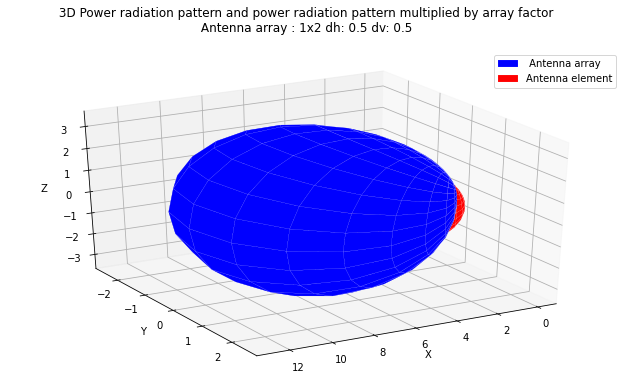

In [142]:
g_an.plot_3d_pattern_array_factor_product(aBS, 0, 0)

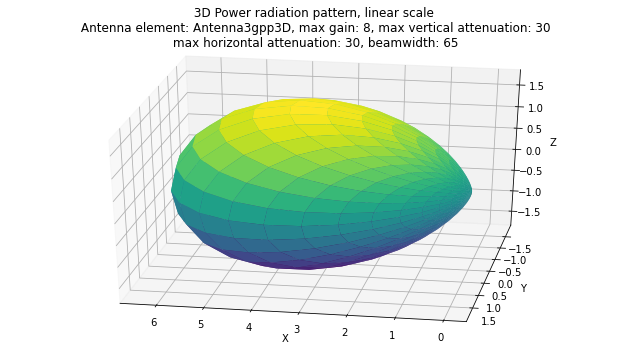

In [67]:
g_an.plot_3d_pattern(aeBS)


The 3D distance is outside the validity range for indoor office 0.0
The 3D distance is outside the validity range for indoor office 0.0
The 3D distance is outside the validity range for indoor office 0.0
The 3D distance is outside the validity range for indoor office 0.5
The 3D distance is outside the validity range for indoor office 0.5
The 3D distance is outside the validity range for indoor office 0.5


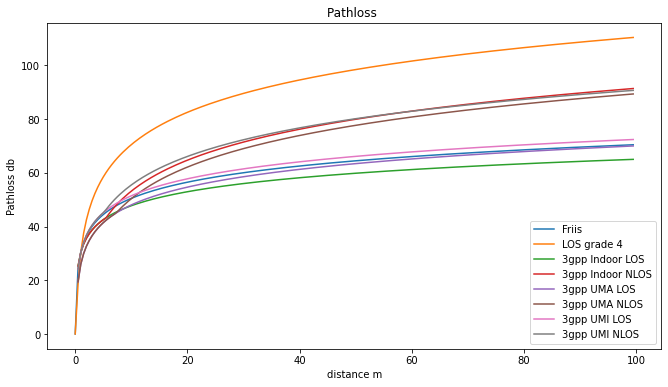

In [97]:
g_scn.graph_pathloss([0, 1, 2],fcGHz,posx_min,posx_max,posy_min,posy_max,grid_number,BS_pos,Ptx_db)

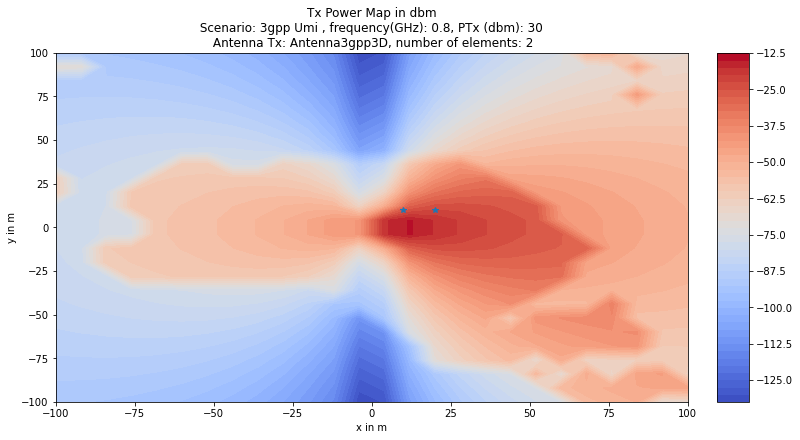

In [85]:
g_scn.graph_Txpower_map(aBS, scf, 0, np.array([mspositions1]))

(-100.0, 100.0)

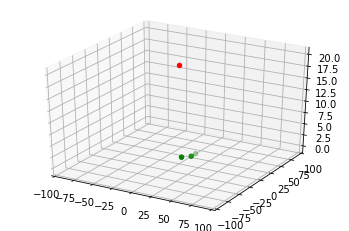

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*BS_pos, color='r')
# ax.scatter(scf.X, scf.Y, np.zeros_like(scf.X))
ax.scatter(*mspositions1, color='g')
ax.set_ylim([posy_min, posy_max])
ax.set_xlim([posx_min, posx_max])

In [4]:

sys.path.append('./src')
sys.path.append('./src/gui')
sys.path.append('./src/graph')

SIM_NAME = "test" #the name of the simulation. Used to give the name 
#to the directory where to store the simulation results

######## Build and configure the receive and transmit antennas 
nMS=2 # number of antennas in the Mobile Station antenna array
nBS = 2 # number of antennas in the Base Station antenna array
antenna_gain = 8
aeBS = antennas.Antenna3gpp3D(antenna_gain) # Build the Base Station antenna element
aBS  = antennas.AntennaArray3gpp(0.5, 0.5, 1, nBS, 0, 0, 0, aeBS, 1,"antennaRx") # Build the Base Station antenna array 
aeMS  = antennas.AntennaIsotropic(antenna_gain) #Build the Mobile Station antenna element
aMS  = antennas.AntennaArray3gpp(0.5, 0.5, 1, nMS, 0, 0, 0, aeMS, 1,"antennaTx") # Build the MS antenna array
###########################################################
###### Build the steering vectors for beamforming according the the BS and MS positions
wBS = aBS.compute_phase_steering (0,np.pi/2,0,0)
""" BS steering vector for baemforming""" 
wMS = aMS.compute_phase_steering (np.pi,np.pi/2,0,0)
""" MS steering vector for baemforming"""
#####################################################    
######## Build the scenario 
fcGHz = 30  # Scenario frequency in GHz 
# The next variables define the maximum and minimum x and y coordinates of the system (in meters)
posx_min = -100
posx_max = 100
posy_min = -100
posy_max = 100
grid_number = 25 # The number of elements in the grid. In order to define the parameters of the scenario PyWiCh generate a grid        of correlated parameters. The grid has  grid_number x  grid_number points.
BS_pos = np.array([0,0,20]) # The position of the Base Station device in the scenario.
Ptx_db = 30 # The Transmit power of the BS in dbm
force_los = 2 # The Line of Sight condition. If variable is 0 Non LOS is forced in all points of the scenario. If it is 1 LOS is forced in all scenario. If its value is 2 the LOS condition come from the scenario probability model.
scf=  sc.Scenario3GPPUmi(fcGHz, posx_min,posx_max, posy_min, posy_max, grid_number, BS_pos, Ptx_db,True,force_los)
# The previous instruction creates a  3gpp Umi scenario Model.""" 
#####################################################
########## Build the OFDM frequency band
freq_band =  fb.FrequencyBand(fcGHz=fcGHz,number_prbs=81,bw_prb=10000000,noise_figure_db=5.0,thermal_noise_dbm_Hz=-174.0) 
freq_band.compute_tx_psd(tx_power_dbm=30) # Sets the BS tranmision power and build the power spectral density of each subchannel of the OFDM systems.
###################################################
 #### Build the channel performance object to runs the simulation  and gets the results after the simulation
performance  = cp.ChannelPerformance()
""" Channel performance object"""

###########################save scenario
path = "./data/"+SIM_NAME 
try:
    os.makedirs(path)
except OSError as e:
    if e.errno == errno.EEXIST:
        print('Error: ' + path+ '  Directory exists. Directory not created. Please select another name or delete the directory')

    else:
        print('Exception!',str(e)+' occurred.' )

scf.save(path)
aBS.save(path)
aMS.save(path)
freq_band.save(path)

###################### Mobile stations routes configuratiom
n_MS = 1 # number of MSs in this simulation
positions = np.empty(shape=(n_MS),dtype = object) # The positions of the route of all MSs
mspositions1= np.array(([10,10,2],[20,10,2])) # The positions of the MS 1. It has only two points in its route.
positions[0] = mspositions1
times  = np.empty(shape=(n_MS),dtype = object) # The times of each point in the MS route
timesMS1 = np.array(([0,0.01])) # Th first point of the route is in simulation time 0 s and the second in the simulation time 0.1 s.
times[0] = timesMS1
 # The path to save the results of the simulation.
performance.compute_path(scf, freq_band, aMS,aBS,positions,times,force_los,path,mode=2,scatters_move=False,move_probability=0,v_min_scatters=0,v_max_scatters=10)               
#####################################################

Error: ./data/test  Directory exists. Directory not created. Please select another name or delete the directory


In [5]:
scf.BS_pos

array([ 0,  0, 20])